# Machine Learning Pipeline applied to recommender system using GAN based on Amazon review dataset

## Data Acquisition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import gzip
import json
import ast
import re
from bs4 import BeautifulSoup
import html


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/Video_Games.csv')
df.head()

<ipython-input-3-f5d1cfc8597c>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/data/Video_Games.csv')


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN
1,3.0,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000,NaN,NaN,NaN
2,4.0,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,I had to learn the hard way after ordering thi...,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,1391731200,15,NaN,NaN
3,1.0,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,The product description should state this clea...,does not work on Mac OSX,1391731200,11,NaN,NaN
4,4.0,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,I would recommend this learning game for anyon...,Roughing it,1389830400,NaN,NaN,NaN


In [ ]:
df_meta = pd.read_csv('/content/drive/My Drive/data/Video_Games_meta.csv')
df_meta.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"['Video Games', 'PC', 'Games']",NaN,[],NaN,Reversi Sensory Challenger,[],NaN,Fidelity Electronics,[],"['>#2,623,937 in Toys &amp; Games (See Top 100...",[],Toys &amp; Games,NaN,NaN,NaN,0042000742,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
1,"['Video Games', 'Xbox 360', 'Games', '</span><...",NaN,['Brand new sealed!'],NaN,Medal of Honor: Warfighter - Includes Battlefi...,['B00PADROYW'],NaN,by\n \n EA Games,[],"['>#67,231 in Video Games (See Top 100 in Vide...","['B0050SY5BM', 'B072NQJCW5', 'B000TI836G', 'B0...",Video Games,NaN,NaN,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
2,"['Video Games', 'Retro Gaming & Microconsoles'...",NaN,[],NaN,street fighter 2 II turbo super nintendo snes ...,[],NaN,Nintendo,[],"['>#134,433 in Video Games (See Top 100 in Vid...",[],Video Games,NaN,NaN,$0.72,0276425316,[],[],NaN
3,"['Video Games', 'Xbox 360', 'Accessories', 'Co...",NaN,"[""MAS's Pro Xbox 360 Stick (Perfect 360 Stick)...",NaN,Xbox 360 MAS STICK,[],NaN,by\n \n MAS SYSTEMS,['Original PCB used from Xbox 360 Control Pad ...,"['>#105,263 in Video Games (See Top 100 in Vid...",[],Video Games,NaN,NaN,NaN,0324411812,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
4,"['Video Games', 'PC', 'Games', '</span></span>...",NaN,"['Phonics Alive! 3, The Speller teaches studen...",NaN,Phonics Alive! 3: The Speller,[],NaN,by\n \n Advanced Software Pty. Ltd.,"['Grades 2-12', 'Spelling Program', 'Teaches S...","['>#92,397 in Video Games (See Top 100 in Vide...",['B000BCZ7U0'],Video Games,NaN,NaN,NaN,0439335310,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN


## Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565349 entries, 0 to 2565348
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   reviewerName    object 
 6   reviewText      object 
 7   summary         object 
 8   unixReviewTime  int64  
 9   vote            object 
 10  style           object 
 11  image           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 217.7+ MB


In [ ]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84819 entries, 0 to 84818
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         84819 non-null  object 
 1   tech1            2847 non-null   object 
 2   description      84819 non-null  object 
 3   fit              0 non-null      float64
 4   title            84808 non-null  object 
 5   also_buy         84819 non-null  object 
 6   tech2            234 non-null    object 
 7   brand            80783 non-null  object 
 8   feature          84819 non-null  object 
 9   rank             84819 non-null  object 
 10  also_view        84819 non-null  object 
 11  main_cat         84699 non-null  object 
 12  similar_item     281 non-null    object 
 13  date             10057 non-null  object 
 14  price            59359 non-null  object 
 15  asin             84819 non-null  object 
 16  imageURL         84819 non-null  object 
 17  imageURLHigh

In [ ]:
df.describe()

,overall,unixReviewTime
count,2.565349e+06,2.565349e+06
mean,4.022095e+00,1.388666e+09
std,1.405936e+00,1.159381e+08
min,1.000000e+00,8.789472e+08
25%,3.000000e+00,1.356653e+09
50%,5.000000e+00,1.421885e+09
75%,5.000000e+00,1.465430e+09
max,5.000000e+00,1.538438e+09


In [ ]:
print('df: ',df.shape)
print('df_meta: ',df_meta.shape)

df:  (2565349, 12)
df_meta:  (84819, 19)


In [ ]:
null_values_df = df.isnull().sum()
null_values_df

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName          468
reviewText           1721
summary               841
unixReviewTime          0
vote              2122633
style             1245377
image             2537044
dtype: int64

In [ ]:
null_values_df_meta = df_meta.isnull().sum()
null_values_df_meta

category               0
tech1              81972
description            0
fit                84819
title                 11
also_buy               0
tech2              84585
brand               4036
feature                0
rank                   0
also_view              0
main_cat             120
similar_item       84538
date               74762
price              25460
asin                   0
imageURL               0
imageURLHighRes        0
details              107
dtype: int64

In [ ]:
df_duplicates = df.duplicated().sum()
print('Dupicates of df: ',df_duplicates)

df_meta_duplicates = df_meta.duplicated().sum()
print('Dupicates of df_meta: ',df_meta_duplicates)

Dupicates of df:  74212
Dupicates of df_meta:  12908


In [ ]:
count_brackets = df_meta.apply(lambda x: x == "[]").sum()
print('Rows that have [] which are empty\n',count_brackets)

Rows that have [] which are empty
 category            2425
tech1                  0
description        10159
fit                    0
title                  1
also_buy           49424
tech2                  0
brand                  0
feature            22871
rank                4500
also_view          39778
main_cat               0
similar_item           0
date                   0
price                  0
asin                   0
imageURL           22863
imageURLHighRes    22863
details                0
dtype: int64


## Data Transformation & Data Cleaning

In [ ]:
df_meta['category'].astype('string')

0                           ['Video Games', 'PC', 'Games']
1        ['Video Games', 'Xbox 360', 'Games', '</span><...
2        ['Video Games', 'Retro Gaming & Microconsoles'...
3        ['Video Games', 'Xbox 360', 'Accessories', 'Co...
4        ['Video Games', 'PC', 'Games', '</span></span>...
                               ...                        
84814    ['Video Games', 'PlayStation Vita', 'Digital G...
84815    ['Video Games', 'PlayStation 4', 'Digital Game...
84816    ['Video Games', 'PlayStation 4', 'Digital Game...
84817    ['Video Games', 'Xbox 360', 'Accessories', '</...
84818    ['Video Games', 'PC', 'Accessories', 'Gaming M...
Name: category, Length: 84819, dtype: string

In [ ]:
def transform_column_str(value):
    if pd.isnull(value) or value == '':
        return np.nan
    try:
        list_value = ast.literal_eval(str(value))
        if isinstance(list_value, list):
            return ', '.join(map(str, list_value))
    except (ValueError, SyntaxError):
        return value
    return value

df_meta = df_meta.applymap(transform_column_str)
df_meta.head(2)


,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"Video Games, PC, Games",NaN,,NaN,Reversi Sensory Challenger,,NaN,Fidelity Electronics,,">#2,623,937 in Toys &amp; Games (See Top 100 i...",,Toys &amp; Games,NaN,NaN,NaN,0042000742,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN
1,"Video Games, Xbox 360, Games, </span></span></...",NaN,Brand new sealed!,NaN,Medal of Honor: Warfighter - Includes Battlefi...,B00PADROYW,NaN,by\n \n EA Games,,">#67,231 in Video Games (See Top 100 in Video ...","B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ72...",Video Games,NaN,NaN,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN


In [ ]:
def clean_html(text):
    if pd.isnull(text):
        return text
    text = str(text)
    text = html.unescape(text)
    text = re.sub(r'<[^>]*', '', text)
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'\n|\r|\t', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'>>>', '', text)
    text = re.sub(r'"', '', text)
    text = re.sub(r"'", '', text)
    text = re.sub(r'\[\'', '', text)
    text = re.sub(r"^'|'$", '', text)
    text = text.strip()
    return text

df_meta = df_meta.applymap(clean_html)
df_meta.head(2)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"Video Games, PC, Games",NaN,,NaN,Reversi Sensory Challenger,,NaN,Fidelity Electronics,,">#2,623,937 in Toys & Games (See Top 100 in To...",,Toys & Games,NaN,NaN,NaN,0042000742,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN
1,"Video Games, Xbox 360, Games,",NaN,Brand new sealed!,NaN,Medal of Honor: Warfighter - Includes Battlefi...,B00PADROYW,NaN,by EA Games,,">#67,231 in Video Games (See Top 100 in Video ...","B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ72...",Video Games,NaN,NaN,,0078764343,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN


In [ ]:
df_meta['category'] = df_meta['category'].apply(lambda x: re.sub(r'\[', '', str(x)))
df_meta['brand'] = df_meta['brand'].apply(lambda x: re.sub(r'by', '', str(x)))
contains_substring_in_column1 = df_meta['category'].apply(lambda x: "[" in str(x))
contains_substring_in_column1.sum()

0

In [ ]:
def replace_nulls(value):
  if pd.isnull(value) or value == '':
        return np.nan
  return value

df_meta = df_meta.applymap(replace_nulls)
df_meta.head(2)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"Video Games, PC, Games",NaN,NaN,NaN,Reversi Sensory Challenger,NaN,NaN,Fidelity Electronics,NaN,">#2,623,937 in Toys & Games (See Top 100 in To...",NaN,Toys & Games,NaN,NaN,NaN,0042000742,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN
1,"Video Games, Xbox 360, Games,",NaN,Brand new sealed!,NaN,Medal of Honor: Warfighter - Includes Battlefi...,B00PADROYW,NaN,EA Games,NaN,">#67,231 in Video Games (See Top 100 in Video ...","B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ72...",Video Games,NaN,NaN,NaN,0078764343,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN


In [ ]:
df = df.applymap(replace_nulls)
df = df.applymap(clean_html)
df.head(2)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN
1,3.0,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000,NaN,NaN,NaN


In [ ]:
df_meta['category'] = df_meta['category'].str.replace(' ,', ',', regex=False).str.replace(', ', ',', regex=False)
df_meta['category'] = df_meta['category'].str.replace(',,+', ',', regex=True)
df_meta['category'] = df_meta['category'].str.strip(',')
print(df_meta['category'].head())

0                                 Video Games,PC,Games
1                           Video Games,Xbox 360,Games
2    Video Games,Retro Gaming & Microconsoles,Super...
3    Video Games,Xbox 360,Accessories,Controllers,J...
4    Video Games,PC,Games,Grades 2-12,Spelling Prog...
Name: category, dtype: object


In [ ]:
def keep_first_three_categories(value):
    if isinstance(value, str):
        categories_list = value.split(',')
        first_three_categories = categories_list[:3]
        return ','.join(first_three_categories)
    else:
        return value

df_meta['category'] = df_meta['category'].apply(keep_first_three_categories)
print(df_meta['category'].head(10))


0                                 Video Games,PC,Games
1                           Video Games,Xbox 360,Games
2    Video Games,Retro Gaming & Microconsoles,Super...
3                     Video Games,Xbox 360,Accessories
4                                 Video Games,PC,Games
5                                 Video Games,PC,Games
6                                 Video Games,PC,Games
7                                 Video Games,PC,Games
8                                 Video Games,PC,Games
9                                 Video Games,PC,Games
Name: category, dtype: object


In [ ]:
category_counts = df_meta['category'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False)
category_counts

Video Games                                                                       82394
Games                                                                             25224
Accessories                                                                       23759
PC                                                                                23421
Retro Gaming & Microconsoles                                                      22880
                                                                                  ...  
1 full set                                                                            1
Optimized solution for clip mounting the Xbox One Kinect Sensor                       1
3D Analog Joystick Replacement for New 3DS XL Nintendo (2015 New Version)             1
2015 Nintendo New Version Nintendo 3DS XL Replacement Full Shell / Housing Red        1
Retractable and removable shoulder stock                                              1
Name: category, Length: 1214, dt

In [ ]:
category_counts.nunique()

65

In [ ]:
columns_to_drop_meta = ['imageURL', 'imageURLHighRes','fit', 'tech1', 'tech2', 'price','tech2','similar_item','date','feature','details']
df_meta = df_meta.drop(columns=columns_to_drop_meta)

In [ ]:
columns_to_drop_meta = ['vote','style','unixReviewTime','image']
df = df.drop(columns=columns_to_drop_meta)

In [ ]:
df_meta.drop_duplicates(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df_meta['brand'] = df_meta['brand'].str.lower().str.strip()
df_meta['brand'] = df_meta['brand'].replace('ninten\x01do', 'nintendo')

In [ ]:
merge_df = pd.merge(df_meta, df, how='inner', on='asin')
merge_df.head(2)

,category,description,title,also_buy,brand,rank,also_view,main_cat,asin,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary
0,"Video Games,PC,Games",NaN,Reversi Sensory Challenger,NaN,Fidelity Electronics,">#2,623,937 in Toys & Games (See Top 100 in To...",NaN,Toys & Games,0042000742,5.0,True,"03 11, 2015",A285UYK35TF093,Stefano,Simply extraordinary! A jump into my past and ...,Top of the top Reversi Machine
1,"Video Games,Xbox 360,Games",Brand new sealed!,Medal of Honor: Warfighter - Includes Battlefi...,B00PADROYW,EA Games,">#67,231 in Video Games (See Top 100 in Video ...","B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ72...",Video Games,0078764343,5.0,False,"09 4, 2014",A38A8ACEHLMQ9X,juan arango,Good product. Zero Problem.,Five Stars


In [ ]:
merge_df.shape

(2488655, 16)

In [ ]:
u=merge_df.isnull().sum()
u

category         16450
description     140851
title               30
also_buy        564217
brand                0
rank             62540
also_view       263192
main_cat          1332
asin                 0
overall              0
verified             0
reviewTime           0
reviewerID           0
reviewerName       449
reviewText        1701
summary            827
dtype: int64

In [ ]:
df_meta = df_meta.dropna()
df = df.dropna()

In [ ]:
merge_df = merge_df.dropna()

## Data Visualisation

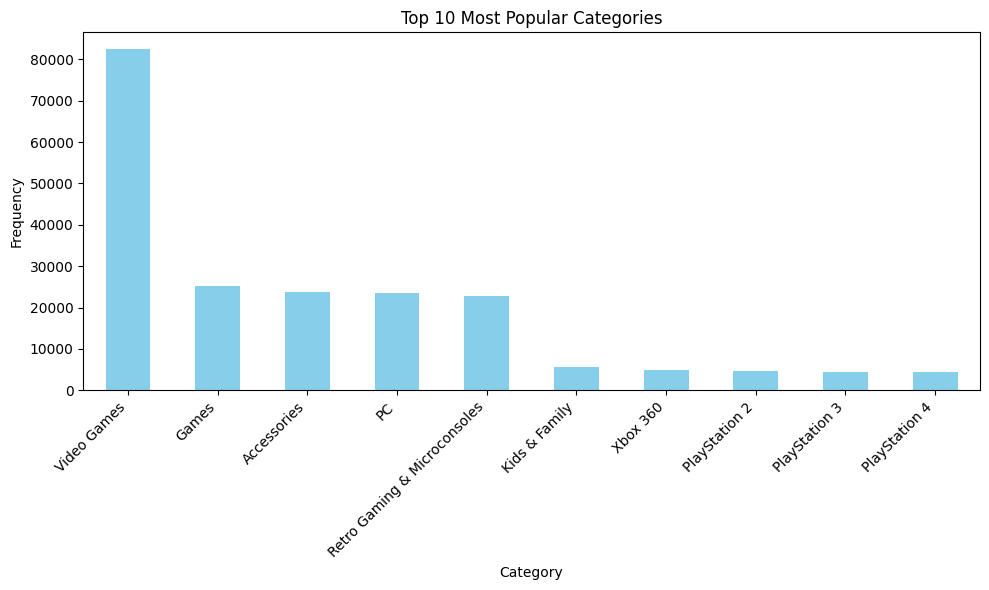

In [ ]:
top_categories = category_counts.head(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

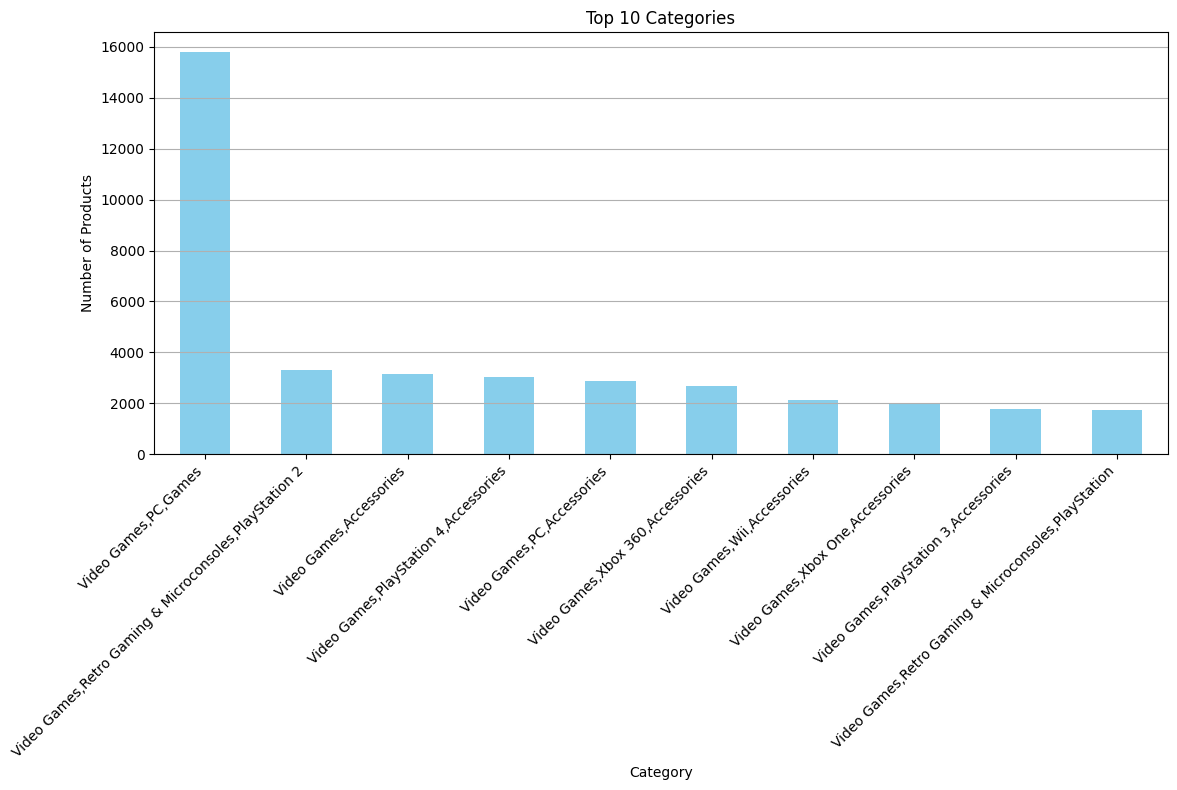

In [ ]:
# Category Distribution: A bar chart or pie chart showing the distribution of products across different categories.
# This can give insights into which categories are more popular or have more products.
# Assuming 'top_categories_excluding_first' is a DataFrame with your data

top_categories_excluding_first = df_meta['category'].value_counts().head(10)
plt.figure(figsize=(12, 8))  # Bigger figure size
top_categories_excluding_first.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


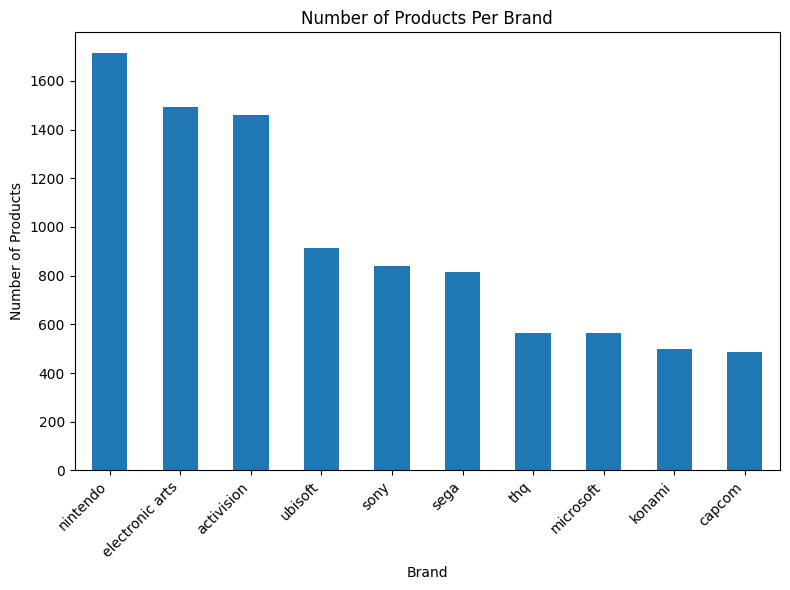

In [ ]:
brand_counts = df_meta['brand'].value_counts()

plt.figure(figsize=(8, 6))
brand_counts.head(10).plot(kind='bar')
plt.title('Number of Products Per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
ratings_per_product = merge_df['title'].value_counts().sort_index()
most_rated_product = ratings_per_product.idxmax()
most_rated_product_count = ratings_per_product.max()

print(f"The most rated product is: {most_rated_product} with {most_rated_product_count} ratings.")


The most rated product is: Playstation Plus: 3 Month Membership [Digital Code] with 5079 ratings.


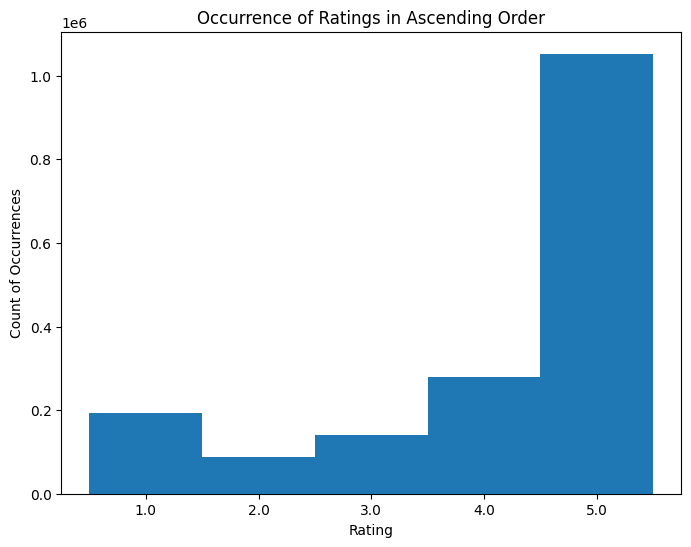

In [ ]:
rating_counts = merge_df['overall'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
rating_counts.sort_index().plot(kind='bar', width=1)
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of Occurrences')
plt.xticks( rotation=0)
plt.show()


In [ ]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

In [ ]:
df['year'] = df['reviewTime'].dt.year
df['month'] = df['reviewTime'].dt.month

In [ ]:
unique_ratings = df['overall'].unique()
print(unique_ratings)
df['overall'] = df['overall'].astype(str).str.split('.').str[0]

# Now convert the 'overall' column to numeric, coercing any errors into NaN (which we can then fill or drop)
df['overall'] = pd.to_numeric(df['overall'], errors='coerce')

# Check if there are any NaN values that were converted from non-numeric strings, and decide how to handle them
print(df['overall'].isna().sum())

# If there are NaN values and you want to remove those rows
df = df.dropna(subset=['overall'])


['1.0' '3.0' '4.0' '5.0' '2.0']
0


In [ ]:
monthly_review_counts = df.groupby(['year', 'month']).size()


In [ ]:
monthly_average_ratings = df.groupby(['year', 'month'])['overall'].mean()

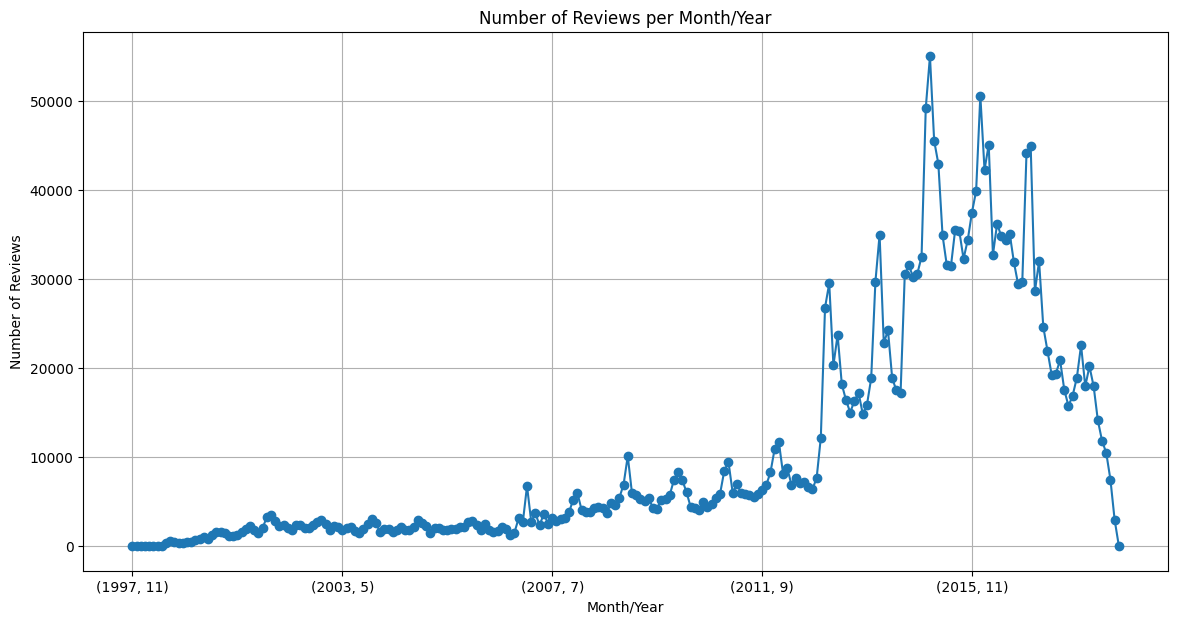

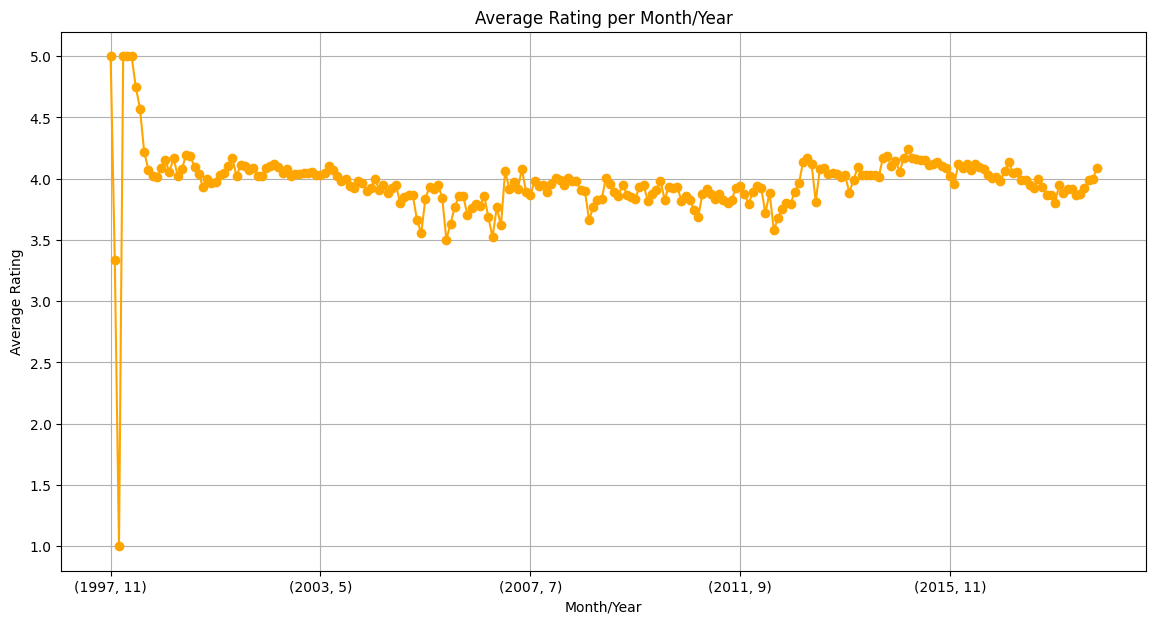

In [ ]:
# Plot number of reviews per month/year
plt.figure(figsize=(14, 7))
monthly_review_counts.plot(kind='line', marker='o')
plt.title('Number of Reviews per Month/Year')
plt.xlabel('Month/Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

# Plot average rating over time
plt.figure(figsize=(14, 7))
monthly_average_ratings.plot(kind='line', marker='o', color='orange')
plt.title('Average Rating per Month/Year')
plt.xlabel('Month/Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

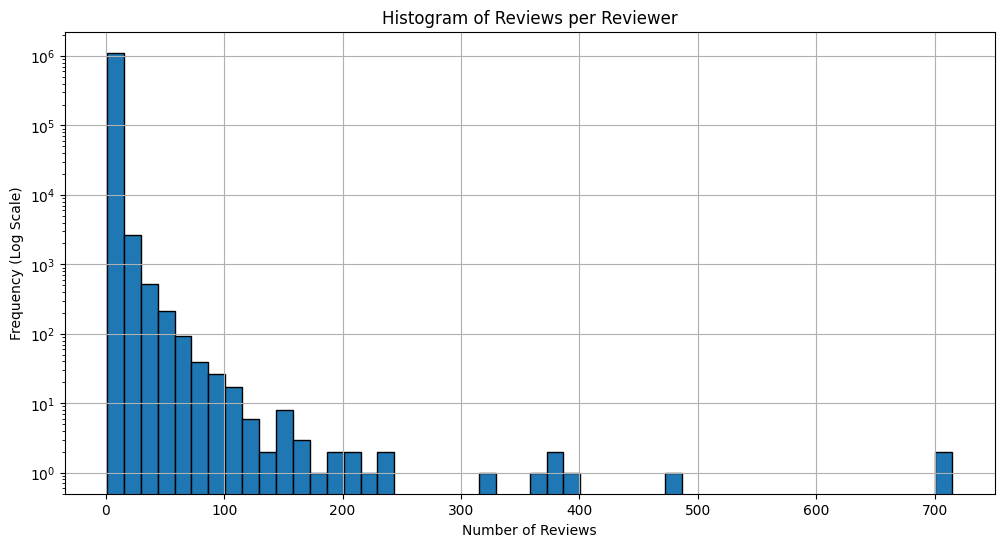

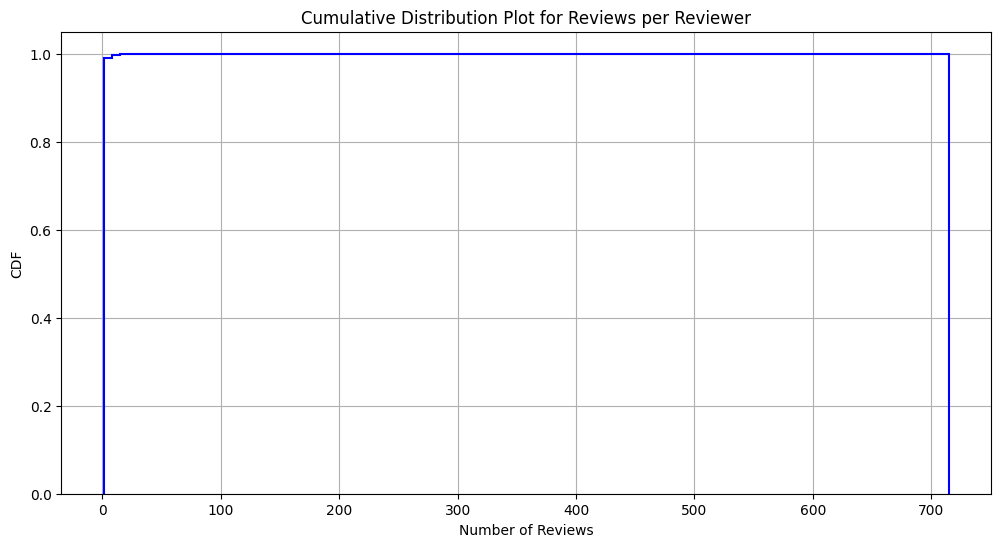

Number of 'power reviewers': 19904
AJKWF4W7QD4NS     715
A3V6Z4RCDGRC44    715
A2TCG2HV1VJP6V    478
A3W4D8XOGLWUN5    395
A119Q9NFGVOEJZ    385
                 ... 
A3S6LMTQFVSEN       7
A3A90CELVLOUP6      7
AEKIEOU5RBV2K       7
A3NWPDACUKDDLH      7
AFS9UMV17ZBMV       7
Name: reviewerID, Length: 19904, dtype: int64


In [ ]:
review_counts_per_reviewer = merge_df['reviewerID'].value_counts()

# Plot a histogram of review counts
plt.figure(figsize=(12, 6))
review_counts_per_reviewer.hist(bins=50, edgecolor='black')
plt.yscale('log', nonpositive='clip')  # Use logarithmic scale due to wide distribution ranges
plt.title('Histogram of Reviews per Reviewer')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency (Log Scale)')
plt.show()

# Plot a cumulative distribution plot
plt.figure(figsize=(12, 6))
review_counts_per_reviewer.hist(bins=100, cumulative=True, density=True, histtype='step', color='blue', linewidth=1.5)
plt.title('Cumulative Distribution Plot for Reviews per Reviewer')
plt.xlabel('Number of Reviews')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

# To identify 'power reviewers', look at those who have reviewed significantly more than the average.
# You may define a threshold, like reviewers who have reviewed more than 2 standard deviations above the mean.
threshold = review_counts_per_reviewer.mean() + 2 * review_counts_per_reviewer.std()
power_reviewers = review_counts_per_reviewer[review_counts_per_reviewer > threshold]

print(f"Number of 'power reviewers': {len(power_reviewers)}")
print(power_reviewers)

## Data Visualiation


Time Series Analysis: Line graphs showing trends over time, such as the number of reviews per month/year or the average rating over time. This could help in identifying patterns or seasonal trends.

Word Clouds: For textual data like reviewText and summary, word clouds can be useful to visually represent the most frequently used words in the reviews.

Sentiment Analysis Over Time: After performing sentiment analysis on reviewText, you could plot the sentiment score over time to see how public opinion about a product or brand has changed.

Correlation Heatmap: A heatmap showing correlations between numerical features like rank, overall rating, and the length of review text.

Review Length Analysis: Histograms or box plots showing the distribution of review text length, which could be correlated with the rating or sentiment of the review.

Network Graphs: If your data includes information about products commonly bought together (also_buy) or viewed together (also_view), you can create network graphs to visualize these relationships.

Geographical Analysis: If you have location data of reviewers, you can use it to create geographical plots (like heatmaps) to show where reviews are coming from.

Reviewer Analysis: Analyze the number of reviews per reviewer, showing if there are any 'power reviewers'. This could be visualized using histograms or cumulative distribution plots.

## Data Splitting

## Model Training

## Model Evaluation

## Post-Processing